In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
dataset = pd.read_csv('./Heart_Disease_Dataset.csv')
print("Data Size: ",dataset.shape[0]," samples")
print("missing values: ")
print(dataset.isnull().sum(axis=0))
print(dataset.groupby('target').count().mean(axis=1))



Data Size:  1190  samples
missing values: 
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
target
0    561.0
1    629.0
dtype: float64


the size of dataset is 1190 samples. there is no missing values. and the 2 calss are balanced approximatley.

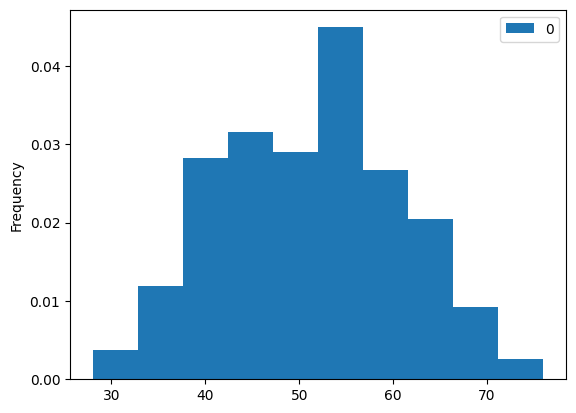

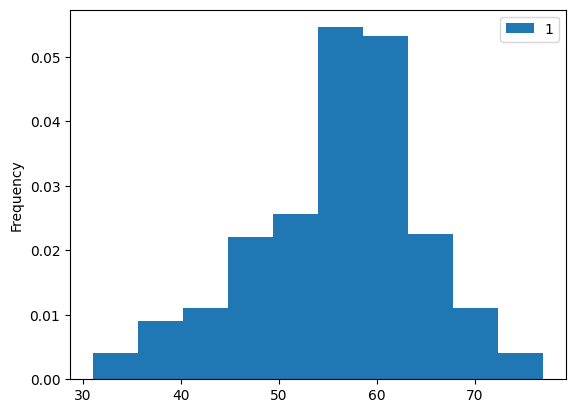

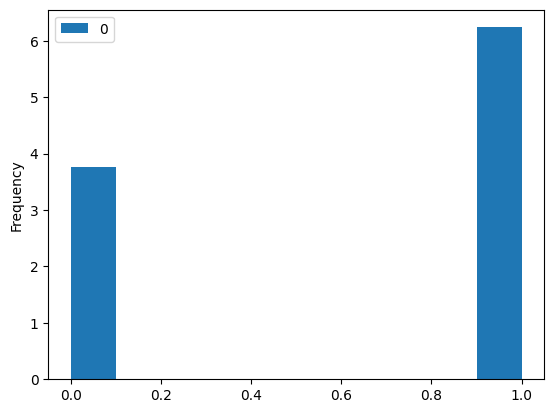

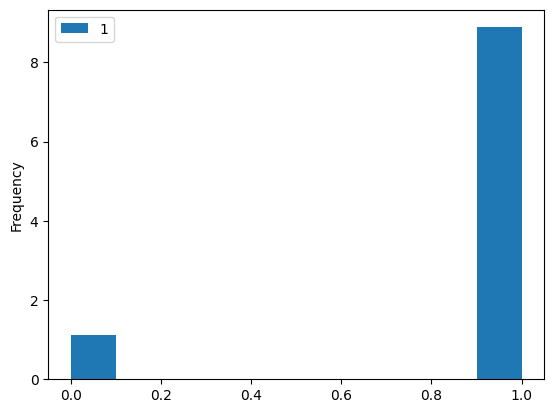

In [ ]:
groups = dataset.groupby('target')
for name, group in groups:
    group['age'].plot(kind='hist',density=True,label=name,legend=True)
    plt.show()

for name, group in groups:
    group['sex'].plot(kind='hist',density=True,label=name,legend=True)
    plt.show()



In [ ]:
threshold = 3
outlier_indexes = {}
for col in dataset.columns:
   outlier_indexes[col] = np.where(np.abs(zscore(dataset[col])) > threshold)[0]

indexes_to_remove = np.concatenate(list(outlier_indexes.values()))
dataset_new = dataset.drop(indexes_to_remove)
dataset_new = dataset_new.reset_index()
print('outliers for each column:' ,outlier_indexes)
print('size after remove outliers: ',dataset_new.shape[0])

outliers for each column: {'age': array([], dtype=int64), 'sex': array([], dtype=int64), 'chest pain type': array([], dtype=int64), 'resting bp s': array([ 109,  242,  366,  400,  450,  593,  734,  761, 1013, 1075]), 'cholesterol': array([  30,   76,  149,  618, 1039]), 'fasting blood sugar': array([], dtype=int64), 'resting ecg': array([], dtype=int64), 'max heart rate': array([371, 391]), 'exercise angina': array([], dtype=int64), 'oldpeak': array([ 167,  325,  704,  773,  793,  852,  978, 1010, 1070, 1078, 1172]), 'ST slope': array([], dtype=int64), 'target': array([], dtype=int64)}
size after remove outliers:  1162


In [ ]:
dataset_new

,index,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1158,1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1159,1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1160,1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [ ]:
numerical_cols = ['age','resting bp s','cholesterol','max heart rate','oldpeak']
dataset_new[numerical_cols] = (dataset_new[numerical_cols] - dataset_new[numerical_cols].min(axis=0)) / (dataset_new[numerical_cols].max(axis=0) - dataset_new[numerical_cols].min(axis=0))

In [ ]:
train_set, test_set = train_test_split(dataset_new,test_size=0.3,train_size=0.7)
X_train = train_set.drop(columns=['target'])
X_test = test_set.drop(columns=['target'])
y_train = train_set['target']
y_test = test_set['target']

#linear
svm_linear = SVC(kernel='linear')
hyper_params = {'C':[0.1,1,10,100]}
grid_search = GridSearchCV(svm_linear,hyper_params,cv=5)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_

best_svm = grid_search.best_estimator_
best_svm.fit(X_train,y_train)
y_pred = best_svm.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test,y_pred)
rec_score = recall_score(y_test,y_pred)
f_score = f1_score(y_test,y_pred)
print('Accuracy score for RBF SVM: ',acc_score)
print('Precision score for RBF SVM: ',prec_score)
print('Recall score for RBF SVM: ',rec_score)
print('F1 score for RBF SVM: ',f_score)

Accuracy score for RBF SVM:  0.8424068767908309
Precision score for RBF SVM:  0.8397790055248618
Recall score for RBF SVM:  0.8539325842696629
F1 score for RBF SVM:  0.8467966573816156


In [ ]:
# RBF
svm_rbf = SVC(kernel='rbf')

hyper_params = {'C': [0.1, 1, 10, 100],'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 1,2,10, 100]}
grid_search = GridSearchCV(svm_rbf,hyper_params,cv=5)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_

best_svm = grid_search.best_estimator_
best_svm.fit(X_train,y_train)
y_pred = best_svm.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test,y_pred)
rec_score = recall_score(y_test,y_pred)
f_score = f1_score(y_test,y_pred)
print('Accuracy score for RBF SVM: ',acc_score)
print('Precision score for RBF SVM: ',prec_score)
print('Recall score for RBF SVM: ',rec_score)
print('F1 score for RBF SVM: ',f_score)

Accuracy score for RBF SVM:  0.66189111747851
Precision score for RBF SVM:  0.6666666666666666
Recall score for RBF SVM:  0.6666666666666666
F1 score for RBF SVM:  0.6666666666666666


In [ ]:
best_params

{'C': 10, 'gamma': 0.1}

i tried also as you see i change other parameters but accuracy is still low.

In [ ]:
svm_poly = SVC(kernel='poly')

hyper_params = {'C': [0.1, 1, 10, 100], 'degree': [3,4,5,6,7], 'coef0': [0, 1, 2]}
grid_search = GridSearchCV(svm_poly,hyper_params,cv=5)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_

best_svm = grid_search.best_estimator_
best_svm.fit(X_train,y_train)
y_pred = best_svm.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test,y_pred)
rec_score = recall_score(y_test,y_pred)
f_score = f1_score(y_test,y_pred)
print('Accuracy score for RBF SVM: ',acc_score)
print('Precision score for RBF SVM: ',prec_score)
print('Recall score for RBF SVM: ',rec_score)
print('F1 score for RBF SVM: ',f_score)

Accuracy score for RBF SVM:  0.839541547277937
Precision score for RBF SVM:  0.8306010928961749
Recall score for RBF SVM:  0.8587570621468926
F1 score for RBF SVM:  0.8444444444444443


In [ ]:
best_params

{'C': 100, 'coef0': 2, 'degree': 6}